## This notebook plots results for the evolution of the degeneracy parameter $\psi$ wrt time

In [32]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.offsetbox import AnchoredText
import matplotlib.gridspec as gridspec
%matplotlib inline
from mpmath import polylog
from scipy.interpolate import interp1d
import bokeh.palettes
from scipy.integrate import quad
from lmfit import minimize, Parameters, fit_report
from astropy.constants import G

from matplotlib import rc
rc('font', family='baskerville', size=20.)
rc('text', usetex=True)

In [12]:
#TODO Can I delete this cell??
import os
os.environ["PATH"] += os.pathsep + '/usr/local/texlive/2020/bin/x86_64-darwin'
print(os.getenv("PATH"))

/Users/mariabenito/Desktop/env_BDs/bin:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Library/Apple/usr/bin:/usr/local/texlive/2020/bin/x86_64-darwin


### Checking the results of $\Psi(t)$

In [2]:
# import data
alpha = 0.
#data  = np.genfromtxt("../data/evolution_degeneracy_alpha="+str(alpha)+".dat", unpack=True)
data  = np.genfromtxt("../data/evolution_degeneracy_alpha=0.dat", unpack=True)
time  = data[0]
psi   = data[1]

In [26]:
def degeneracy_Auddy(t, M):
    """
    Time evolution of Psi as given by Auddy et al. 2016 (eq. 47) (for Psi << 1)
    
    Input
    -----
        t : time [years]
        M : mass [Msun]
        
    Output
    ------
        Psi: degeneracy
    """
    return np.power(317.8 + 2.053e-6*np.power(M, -1.094)*t, -0.2794)

def degeneracy(t, M):
    """
    Time evolution of Psi (for Psi << 1). IMPORTANT: I can not recover Auddy's result
    
    Input
    -----
        t : time [years]
        M : mass [Msun]
        
    Output
    ------
        Psi: degeneracy
    """
    xH = 0.5*0.51
    X = 0.75; Y = 0.25; mu_1 = np.power((1+xH)*X + Y/4., -1); mu_e = np.power(X + Y/2., -1)
    kR = 0.01; omega = 1.; gamma = 2.36
    
    f1 = 3.5696*8.4231e-18*3.1536e7*mu_1/np.power(kR, 1.1424)/np.power(mu_e, 8./3.)
    f2 = np.power(gamma, 0.7143)/omega
    
    return np.power(f1*f2*np.power(M, -1.094)*t, -0.2801)

t   = np.logspace(8, 12, 1000)
M   = 0.03
psi_Auddy = degeneracy_Auddy(t, M)
psi_simpl = degeneracy(t, M)

In the figure below we check the asymptotic behaviour of our result for $\Psi(t)$ in the limit that $\Psi<< 1$

(100000000.0, 1000000000000.0)

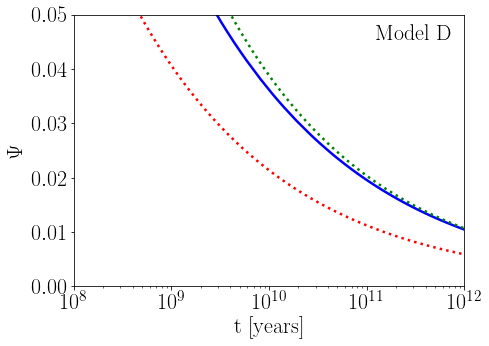

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.plot(time, psi, lw=2.5, color="blue")

ax.plot(t, psi_Auddy, lw=2.5, color="red", ls=":") # Auddy's asymptotic limit
ax.plot(t, psi_simpl, lw=2.5, color="green", ls=":") # our asymptotic limit 

text_box = AnchoredText("Model D", frameon=False, loc=1, pad=0.01)
plt.setp(text_box.patch, facecolor="white")
ax.add_artist(text_box)

#ax.grid(ls='--', alpha=0.5, which="both") # plot grid
#for axis in ['top','bottom','left','right']: # change linesize of borders - aesthetics
#    ax.spines[axis].set_linewidth(1.5)
                        
ax.set_ylabel(r"$\Psi$")
ax.set_xlabel("t [years]")
ax.set_xscale("log")

ax.set_ylim(0., 0.05)
ax.set_xlim(1e8, 1e12)

In the derivation of the asymptotic limit of the time evolution of the degeracy, the factor $1 + b + a\Psi$ is set to one. Below, we check for which values of $\Psi$ this assumption is valid.

/Users/maria/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  
/Users/maria/anaconda2/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  import sys


Text(0.5, 0, '$\\Psi$')

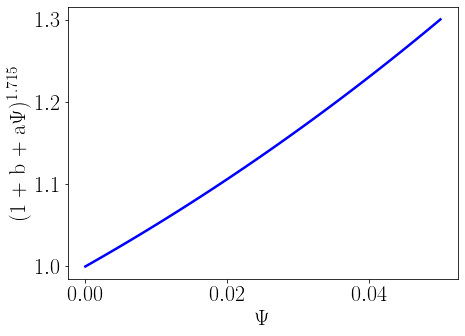

In [18]:
def one_b_a_factor(psi):    
    """
    Return (1 + b(psi) + a psi)^1.715 factor
    """
    xH = 0.5*0.51
    X = 0.75; Y = 0.25; mu_1 = np.power((1+xH)*X + Y/4., -1); mu_e = np.power(X + Y/2., -1)
    
    a = 5*mu_e/2*mu_1
    b = (-5./16.*psi*np.log(1-np.exp(-1./psi)) + 
        15./8.*psi*psi*(np.pi**2/2. + polylog(2, -np.exp(-1./psi))))
    # return
    return np.power(1+b+a*psi, 1.715)

psi    = np.linspace(0., 0.05, 100)
factor = np.zeros(len(psi))
for i in range(len(psi)):
    factor[i] = one_b_a_factor(psi[i])

fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.plot(psi, factor, lw=2.5, color="blue")

ax.set_ylabel(r"(1 + b + a$\Psi)^{1.715}$")
ax.set_xlabel(r"$\Psi$")

#ax.set_ylim(0., 1.)

Below we plot the time evolution of the degeneracy parameter

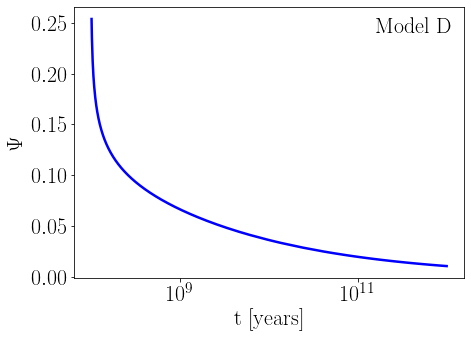

In [29]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.plot(time, psi, lw=2.5, color="blue")

text_box = AnchoredText("Model D", frameon=False, loc=1, pad=0.01)
plt.setp(text_box.patch, facecolor="white")
ax.add_artist(text_box)

#ax.grid(ls='--', alpha=0.5, which="both") # plot grid
#for axis in ['top','bottom','left','right']: # change linesize of borders - aesthetics
#    ax.spines[axis].set_linewidth(1.5)
                        
ax.set_ylabel(r"$\Psi$")
ax.set_xlabel("t [years]")
ax.set_xscale("log")

### Plot degeneracy evolution from [Auddy et al 2016](https://arxiv.org/abs/1607.04338), i.e. equation 47

In [13]:
t   = np.logspace(6, 9, 100)
M   = 0.03
Psi = degeneracy_Auddy(t, M)

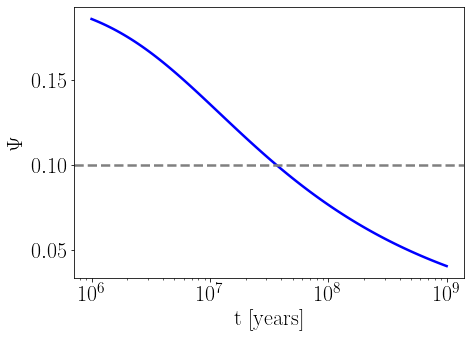

In [5]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

ax.plot(t, Psi, lw=2.5, color="blue")
ax.axhline(0.1, ls="--", color="grey", lw=2.5)

ax.set_ylabel(r"$\Psi$")
ax.set_xlabel("t [years]")
ax.set_xscale("log")

### Study right-hand-side of ODE, i.e.
\begin{equation}
\frac{{\rm d}\Psi}{{\rm d}t} = -\frac{1.1634\times 10^{-18}b_1^{2.856}\mu_I}{k_R^{1.1424}\mu_e^{8/3}}\left(\frac{M_\odot}{M}\right)^{1.094}\Psi^{2.856\nu}\left[1+b(\Psi)+a\Psi\right]^{1.715}\frac{\gamma^{0.7143}}{\Omega}\left(1-1.33\frac{\alpha}{\delta}\right)^{1.143}
\end{equation}

In [2]:
def func(psi, M, b1, nu, mu_1, mu_e, kR, omega, gamma, delta, alpha):
    """
    RHS of equation (XXX)
    """
    a = 5*mu_e/2*mu_1
    b = (-5./16.*psi*np.log(1-np.exp(-1./psi)) + 
        15./8.*psi*psi*(np.pi**2/2. + polylog(2, -np.exp(-1./psi))))
    
    f1 = 1.1634e-18*np.power(b1, 2.856)*mu_1/np.power(kR, 1.1424)/np.power(mu_e, 8./3.)
    f2 = np.power(gamma, 0.7143)/omega*np.power(1.-1.33*alpha/delta, 1.143)
    
    change_to_year = 3.1536e7
    
    # return
    return (-f1*change_to_year*f2*np.power(M, -1.094)*np.power(psi, 2.856*nu)*np.power(1+b+a*psi, 1.715))

In [3]:
psi = np.linspace(0.002, 0.999, 100)
M   = 0.03
b1  = 2.; nu = 1.60; xH = 0.5*0.51
X = 0.75; Y = 0.25; mu_1 = np.power((1+xH)*X + Y/4., -1); mu_e = np.power(X + Y/2., -1)
kR = 0.01; omega=1.; gamma =2.36; delta=5.97; alpha=0.

rhs = np.zeros(100)
i   = 0

for _psi in psi:
    rhs[i] = func(_psi, M, b1, nu, mu_1, mu_e, kR, omega, gamma, delta, alpha)
    i +=1

Text(0.5, 0, '$\\Psi$')

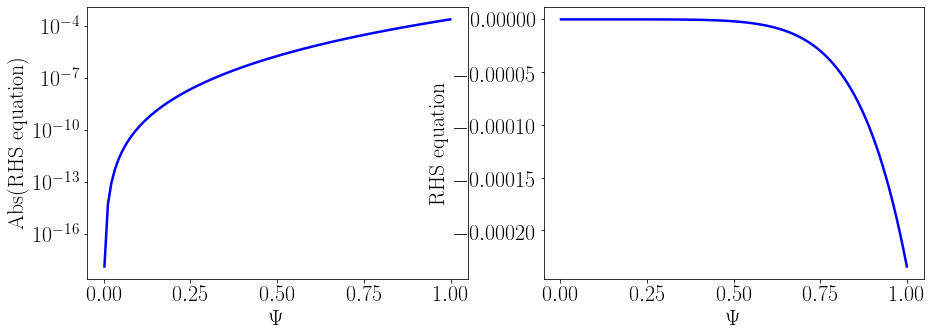

In [6]:
fig, ax = plt.subplots(1, 2, figsize=(15, 5))
ax[0].plot(psi, np.abs(rhs), color="blue", lw=2.5, label="python")
ax[0].set_yscale("log")
ax[0].set_ylabel("Abs(RHS equation)")
ax[0].set_xlabel("$\\Psi$")

ax[1].plot(psi, rhs, color="blue", lw=2.5, label="python")
#ax[1].plot(psi, np.log10(np.abs(rhs)), color="blue", lw=2.5, label="python")
ax[1].set_ylabel("RHS equation")
ax[1].set_xlabel("$\\Psi$")

Study the dependence wrt the mass and the modifications of gravity

In [32]:
M = [0.01, 0.03, 0.05, 0.08, 0.09]

alpha = [-0.1, -0.01, 0., 0.006, 0.010, 0.015]
gamma = [2.25, 2.35, 2.36, 2.36, 2.37, 2.46]
delta = [6.67, 6.09, 5.97, 5.95, 5.93, 5.89]

b1  = 2.; nu = 1.60; xH = 0.5*0.51
X = 0.75; Y = 0.25; mu_1 = np.power((1+xH)*X + Y/4., -1); mu_e = np.power(X + Y/2., -1)
kR = 0.01; omega=1.;

rhs = {}

for i in range(len(alpha)):
    rhs[alpha[i]] = {}
    for m in M:
        rhs[alpha[i]][m] = np.zeros(len(psi))
        k = 0
        for _psi in psi:
            rhs[alpha[i]][m][k] = func(_psi, m, b1, nu, mu_1, mu_e, kR, omega, gamma[i], delta[i], alpha[i])
            k += 1

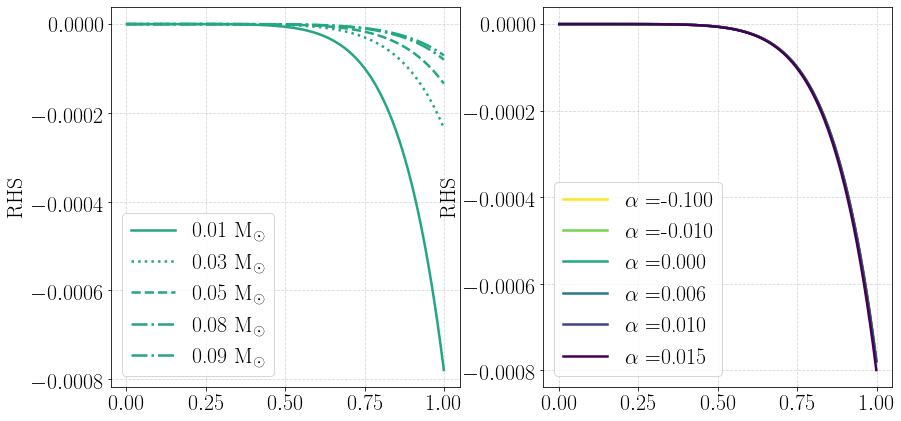

In [39]:
#fig = plt.figure(constrained_layout=True, figsize=(12, 7))
fig = plt.figure(figsize=(14, 7))
gs = fig.add_gridspec(1, 2, hspace=0.09, wspace=0.24)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

a = 0. ; j = 2; i = 0
for m in M:
    ax1.plot(psi, rhs[a][m], ls=ls[i], lw=2.5, color=colors[j], label=("%.2f $\\rm M_{\\odot}$" %m))
    i += 1
ax1.grid(which="both", ls="--", alpha=0.5)
ax1.set_ylabel("RHS")
ax1.legend(frameon=True)

j = 0; i = 0
for a in alpha:
    ax2.plot(psi, rhs[a][M[0]], ls=ls[i], lw=2.5, color=colors[j], label=("$\\alpha=$%.3f" %a))
    j += 1
ax2.grid(which="both", ls="--", alpha=0.5)
ax2.set_ylabel("RHS")
ax2.legend(frameon=True)

### Try to find out an analytical expression for $\Psi$

\begin{equation}
\int_{\Psi}^{1} \frac{{\rm d}\Psi}{f(\Psi)} = C_1 \left(1-1.33\frac{\alpha}{\delta}\right)^{1.143}\frac{\gamma^{0.7143}}{\Omega}\left(\frac{M_{\odot}}{M}\right)^{1.094}\frac{t}{year},
\end{equation}
where 
\begin{equation}
f(\Psi)= \Psi^{2.856\nu}(1+b(\Psi) + a\Psi)^{1.715}
\end{equation}
and
\begin{equation}
C_1=\frac{1.1634\times 10^{-18}b_1^{2.856}\mu_I}{k_R^{1.1424}\mu_e^{8/3}}
\end{equation}

In [126]:
def integrand(psi, nu, mu_1, mu_e):    
    a = 5*mu_e/2*mu_1
    b = (-5./16.*psi*np.log(1-np.exp(-1./psi)) + 
        15./8.*psi*psi*(np.pi**2/2. + polylog(2, -np.exp(-1./psi))))
    # return
    return np.power(psi, -2.856*nu)*np.power(1+b+a*psi, -1.715)

def lhs(psi, nu, mu_1, mu_e):
    # return
    return quad(integrand, psi, 1, args=(nu, mu_1, mu_e,))[0]

def rhs(t, M, b1, nu, mu_1, mu_e, kR, omega, gamma, delta, alpha):
    f1 = 1.1634e-18*np.power(b1, 2.856)*mu_1/np.power(kR, 1.1424)/np.power(mu_e, 8./3.)
    f2 = np.power(gamma, 0.7143)/omega*np.power(1.-1.33*alpha/delta, 1.143)
    
    change_to_year = 3.1536e7
    
    # return
    return (f1*change_to_year*f2*np.power(M, -1.094)*t)

In [135]:
psi  = np.linspace(1e-4, 0.99, 1000)
_lhs = np.zeros(len(psi))

nu = 1.60; xH = 0.5*0.51
X = 0.75; Y = 0.25; mu_1 = np.power((1+xH)*X + Y/4., -1); mu_e = np.power(X + Y/2., -1)

for i in range(len(psi)):
    _lhs[i] = lhs(psi[i], nu, mu_1, mu_e)
    
f_psi = interp1d(psi, _lhs)

kR = 0.01; omega=1.; gamma =2.36; delta=5.97; alpha=0.
M = 0.05
    
t    = np.logspace(0, 10, 400)
_rhs = rhs(t, M, b1, nu, mu_1, mu_e, kR, omega, gamma, delta, alpha)

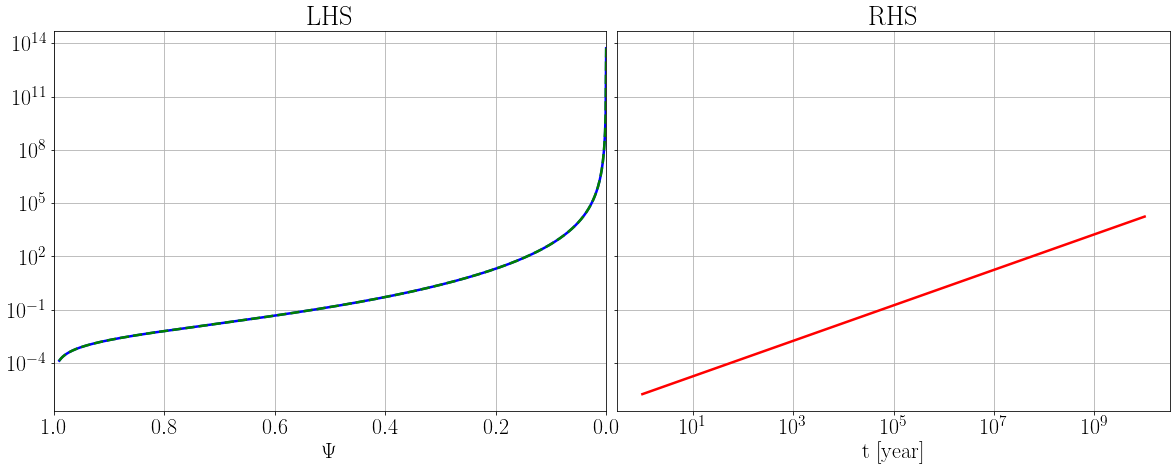

In [136]:
fig, ax = plt.subplots(1, 2, figsize=(20, 7), sharey=True)
fig.subplots_adjust(wspace=0.02)

ax[0].plot(psi, _lhs, lw=2.5, color="blue")
ax[0].plot(psi, f_psi(psi), lw=2.5, color="green", ls="--")
ax[0].set_xlabel("$\\Psi$")
ax[0].set_xlim(1, 0)
ax[0].set_title("LHS")
ax[0].set_yscale("log")
ax[0].grid(which="both")

ax[1].plot(t, _rhs, lw=2.5, color="red")
ax[1].set_xlabel("t [year]")
ax[1].set_xscale("log")
ax[1].set_yscale("log")
ax[1].set_title("RHS")
ax[1].grid(which="both")

#ax[1].set_ylim([-100, 0])

In the following we try to find a functional form of $\Psi$ that fits the blue curve in the left panel.

- 1st try: $f(\Psi) = A + B\Psi + C\Psi^2$ with $\chi^2= 360$
- 2nd try: $f(\Psi) =  A + B\Psi + C\Psi^2 + D\Psi^3$ with $\chi^2 = 172$
- 3rd try: $f(\Psi) =  A + B\Psi + C\Psi^2 + D\Psi^3 + E\Psi^4$ with $\chi^2 = 132$

--> If we decrease the interval of psi and only consider between (0.001 and 0.8)?

In [154]:
def objective_funtion(params):
    """
    Function to be minimized
    """
    A = params['A']
    B = params['B']
    C = params['C']
    D = params["D"]
    E = params["E"]
    
    data  = np.log10(f_psi(psi))
    model = A + B*psi + C*np.power(psi, 2) + D*np.power(psi, 3) + E*np.power(psi, 4)

    # return
    return (data-model)

In [161]:
#psi  = np.linspace(1e-4, 0.99, 1000)
psi = np.linspace(0.01, 0.8, 1000)

In [162]:
params = Parameters()
params.add("A", value=1, vary=True)
params.add("B", value=1, vary=True)
params.add("C", value=1, vary=True)
params.add("D", value=1, vary=True)
params.add("E", value=1, vary=True)

# Optimize
out = minimize(objective_funtion, params)
# Print result optimization
print(fit_report(out))

[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 13
    # data points      = 1000
    # variables        = 5
    chi-square         = 14.4771179
    reduced chi-square = 0.01454987
    Akaike info crit   = -4225.18595
    Bayesian info crit = -4200.64717
[[Variables]]
    A:  5.85316797 +/- 0.02203865 (0.38%) (init = 1)
    B: -39.2897761 +/- 0.36709110 (0.93%) (init = 1)
    C:  106.940417 +/- 1.81250082 (1.69%) (init = 1)
    D: -146.587258 +/- 3.34337044 (2.28%) (init = 1)
    E:  73.6285615 +/- 2.04837234 (2.78%) (init = 1)
[[Correlations]] (unreported correlations are < 0.100)
    C(D, E) = -0.993
    C(C, D) = -0.987
    C(B, C) = -0.972
    C(C, E) =  0.961
    C(B, D) =  0.925
    C(A, B) = -0.894
    C(B, E) = -0.877
    C(A, C) =  0.790
    C(A, D) = -0.712
    C(A, E) =  0.652


(1.0, 0.0)

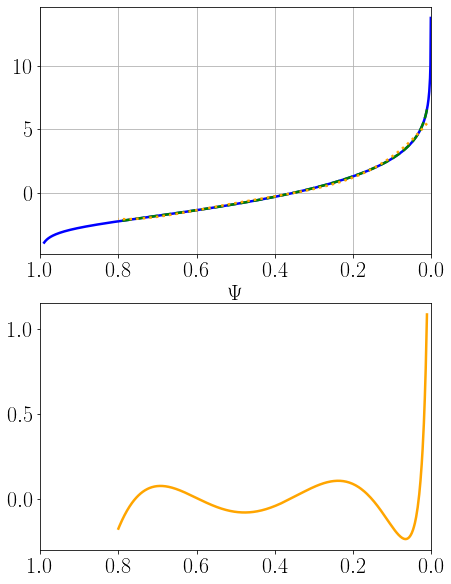

In [163]:
fig, ax = plt.subplots(2, 1, figsize=(7, 10))

psi  = np.linspace(1e-4, 0.99, 1000)
ax[0].plot(psi, np.log10(_lhs), lw=2.5, color="blue")
psi = np.linspace(0.01, 0.8, 1000)
ax[0].plot(psi, np.log10(f_psi(psi)), lw=2.5, color="green", ls="--")
A = out.params["A"].value
B = out.params["B"].value
C = out.params["C"].value
D = out.params["D"].value
E = out.params["E"].value

ax[0].plot(psi, A + B*psi + C*psi*psi + D*psi*psi*psi + E*np.power(psi, 4), lw=2.5, color="orange", ls=":")
ax[0].set_xlabel("$\\Psi$")
ax[0].set_xlim(1, 0)
ax[0].grid(which="both")

ax[1].plot(psi, np.log10(f_psi(psi))-(A + B*psi + C*psi*psi + D*psi*psi*psi + E*np.power(psi, 4)), 
           lw=2.5, color="orange")
ax[1].set_xlim(1, 0)

## Results & plots

In [181]:
ls     = ["solid", "dotted", "dashed", "dashdot", (0, (3, 5, 1, 5, 1, 5))] 

# masses
M      = [0.01, 0.03, 0.05, 0.08, 0.09]

colors = bokeh.palettes.viridis(7) # 6 different combinations of alpha parameters
colors = colors[::-1] # reverse tuple

**Load data**

In [182]:
alpha = [-0.4, -0.1, -0.01, 0., 0.006, 0.010, 0.015]
time  = {}
psi   = {}
for a in alpha:
    try:
        data  = np.genfromtxt("../data/evolution_degeneracy_alpha="+str(a)+".dat", unpack=True)
    except:
        print(a)
        data  = np.genfromtxt("../data/evolution_degeneracy_alpha=0.dat", unpack=True)
    time[a] = data[0]
    psi[a]  = {}
    i       = 1
    for m in M:
        psi[a][m] = data[i]
        i += 1

0.0


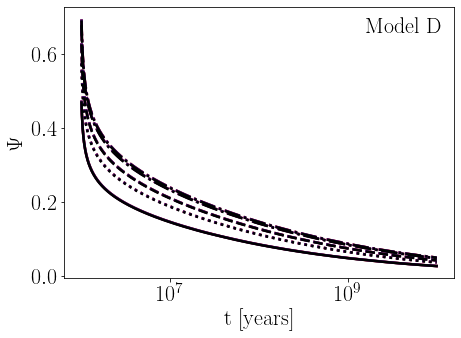

In [44]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

j = 0
for a in alpha:
    i = 0
    for m in M:
        ax.plot(time[a], psi[a][m], ls=ls[i], lw=2.5, color=colors[j])
        i += 1
    j = j+1

text_box = AnchoredText("Model D", frameon=False, loc=1, pad=0.01)
plt.setp(text_box.patch, facecolor="white")
ax.add_artist(text_box)

#ax.grid(ls='--', alpha=0.5, which="both") # plot grid
#for axis in ['top','bottom','left','right']: # change linesize of borders - aesthetics
#    ax.spines[axis].set_linewidth(1.5)
                        
ax.set_ylabel(r"$\Psi$")
ax.set_xlabel("t [years]")
ax.set_xscale("log")

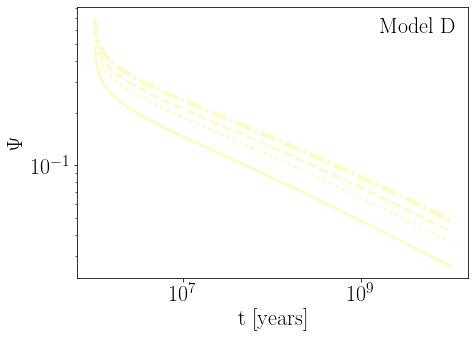

In [47]:
fig, ax = plt.subplots(1, 1, figsize=(7, 5))

j = 0
for a in alpha[0:1]:
    i = 0
    for m in M:
        ax.plot(time[a], psi[a][m], ls=ls[i], lw=2.5, color=colors[j])
        i += 1
    j = j+1

text_box = AnchoredText("Model D", frameon=False, loc=1, pad=0.01)
plt.setp(text_box.patch, facecolor="white")
ax.add_artist(text_box)

#ax.grid(ls='--', alpha=0.5, which="both") # plot grid
#for axis in ['top','bottom','left','right']: # change linesize of borders - aesthetics
#    ax.spines[axis].set_linewidth(1.5)
                        
ax.set_ylabel(r"$\Psi$")
ax.set_xlabel("t [years]")
ax.set_xscale("log")
ax.set_yscale("log")

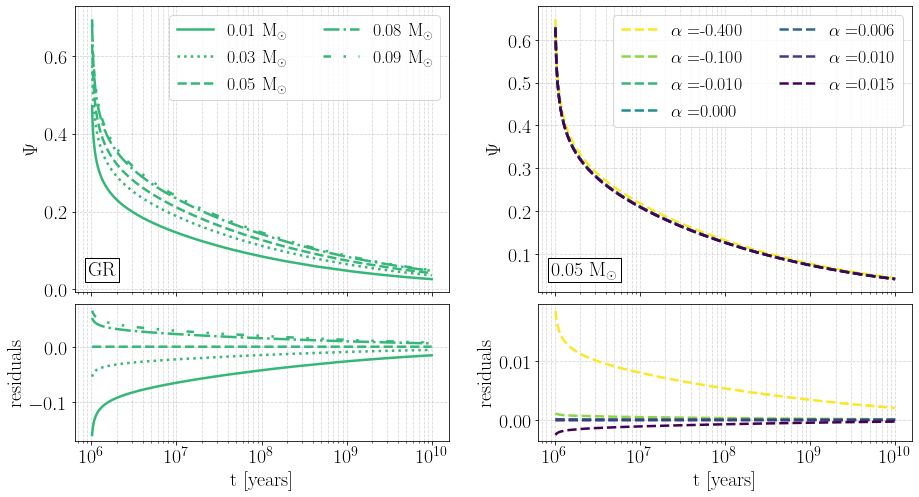

In [115]:
#fig = plt.figure(constrained_layout=True, figsize=(12, 7))
fig = plt.figure(figsize=(15, 8))
gs = fig.add_gridspec(3, 2, hspace=0.09, wspace=0.24)
ax1 = fig.add_subplot(gs[0:2, 0])
ax2 = fig.add_subplot(gs[0:2, 1])
ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)
ax4 = fig.add_subplot(gs[2, 1], sharex=ax2)

a = 0. ; j = 2; i = 0
for m in M:
    ax1.plot(time[a], psi[a][m], ls=ls[i], lw=2.5, color=colors[j], label=("%.2f $\\rm M_{\\odot}$" %m))
    ax3.plot(time[a], (psi[a][m]-psi[a][M[2]]), ls=ls[i], lw=2.5, color=colors[j])
    i += 1
ax1.set_xscale("log")
ax1.tick_params(labelbottom=False)  
ax3.set_xscale("log")
ax1.grid(which="both", ls="--", alpha=0.5)
ax3.grid(which="both", ls="--", alpha=0.5)
ax3.set_xlabel("t [years]")
ax1.set_ylabel(r"$\Psi$")
ax3.set_ylabel(r"residuals")
ax1.legend(frameon=True, loc=1, ncol=2, fontsize=18)
text_box = AnchoredText("GR", frameon=True, loc=3, pad=0.15)
plt.setp(text_box.patch, facecolor="white")
ax1.add_artist(text_box)

j = 0; i = 2
for a in alpha:
    ax2.plot(time[a], psi[a][M[2]], ls=ls[i], lw=2.5, color=colors[j], label=("$\\alpha=$%.3f" %a))
    ax4.plot(time[a], (psi[a][M[2]] - psi[0.][M[2]]), ls=ls[i], lw=2.5, color=colors[j])
    j += 1
ax2.set_xscale("log")
ax2.tick_params(labelbottom=False) 
ax4.set_xscale("log")
ax2.grid(which="both", ls="--", alpha=0.5)
ax4.grid(which="both", ls="--", alpha=0.5)
ax4.set_xlabel("t [years]")
ax2.set_ylabel(r"$\Psi$")
ax4.set_ylabel(r"residuals")
ax2.legend(frameon=True, loc=1, ncol=2, fontsize=18)
text_box = AnchoredText("0.05 $\\rm M_{\\odot}$", frameon=True, loc=3, pad=0.15)
plt.setp(text_box.patch, facecolor="white")
ax2.add_artist(text_box)

fig.savefig("../Figs/degeneracy.pdf", bbox_inches="tight")

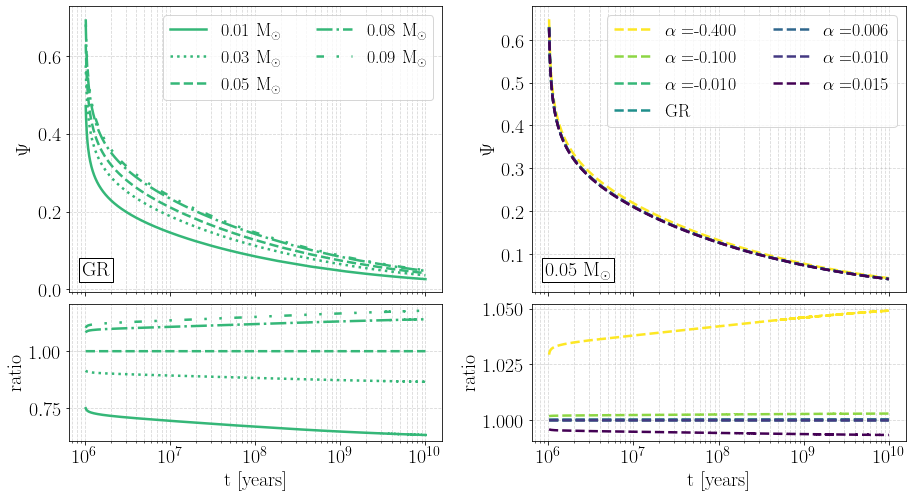

In [195]:
fig = plt.figure(figsize=(15, 8))
gs = fig.add_gridspec(3, 2, hspace=0.09, wspace=0.24)
ax1 = fig.add_subplot(gs[0:2, 0])
ax2 = fig.add_subplot(gs[0:2, 1])
ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)
ax4 = fig.add_subplot(gs[2, 1], sharex=ax2)

a = 0. ; j = 2; i = 0
for m in M:
    ax1.plot(time[a], psi[a][m], ls=ls[i], lw=2.5, color=colors[j], label=("%.2f $\\rm M_{\\odot}$" %m))
    ax3.plot(time[a], (psi[a][m])/psi[a][M[2]], ls=ls[i], lw=2.5, color=colors[j])
    i += 1
ax1.set_xscale("log")
ax1.tick_params(labelbottom=False)  
ax3.set_xscale("log")
ax1.grid(which="both", ls="--", alpha=0.5)
ax3.grid(which="both", ls="--", alpha=0.5)
ax3.set_xlabel("t [years]")
ax1.set_ylabel(r"$\Psi$")
ax3.set_ylabel(r"ratio")
ax1.legend(frameon=True, loc=1, ncol=2, fontsize=18)
text_box = AnchoredText("GR", frameon=True, loc=3, pad=0.15)
plt.setp(text_box.patch, facecolor="white")
ax1.add_artist(text_box)

j = 0; i = 2
for a in alpha:   
    if a==0.:
        ax2.plot(time[a], psi[a][M[2]], ls=ls[i], lw=2.5, color=colors[j], label="GR")
    else:
        ax2.plot(time[a], psi[a][M[2]], ls=ls[i], lw=2.5, color=colors[j], label=("$\\alpha=$%.3f" %a))
    ax4.plot(time[a], (psi[a][M[2]])/psi[0.][M[2]], ls=ls[i], lw=2.5, color=colors[j])
    j += 1
ax2.set_xscale("log")
ax2.tick_params(labelbottom=False) 
ax4.set_xscale("log")
ax2.grid(which="both", ls="--", alpha=0.5)
ax4.grid(which="both", ls="--", alpha=0.5)
ax4.set_xlabel("t [years]")
ax2.set_ylabel(r"$\Psi$")
ax4.set_ylabel(r"ratio")
ax2.legend(frameon=True, loc=1, ncol=2, fontsize=18)
text_box = AnchoredText("0.05 $\\rm M_{\\odot}$", frameon=True, loc=3, pad=0.15)
plt.setp(text_box.patch, facecolor="white")
ax2.add_artist(text_box)

fig.savefig("../Figs/degeneracy.pdf", bbox_inches="tight")

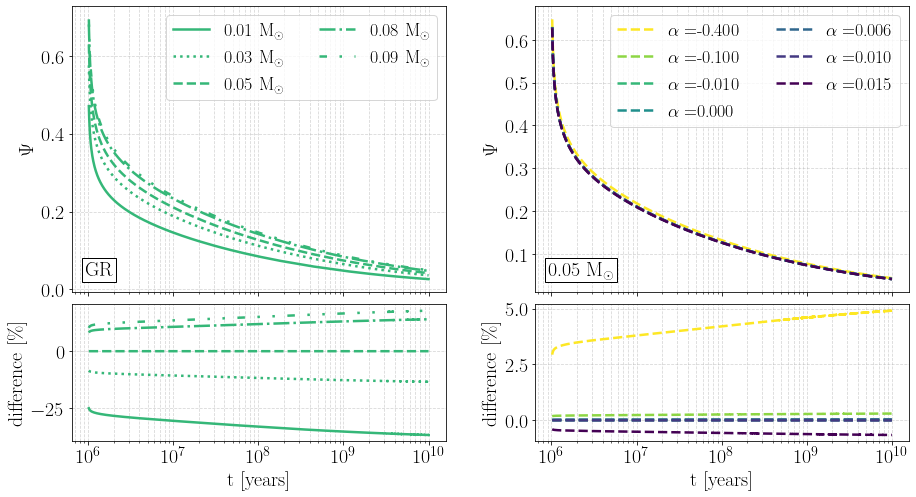

In [183]:
fig = plt.figure(figsize=(15, 8))
gs = fig.add_gridspec(3, 2, hspace=0.09, wspace=0.24)
ax1 = fig.add_subplot(gs[0:2, 0])
ax2 = fig.add_subplot(gs[0:2, 1])
ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)
ax4 = fig.add_subplot(gs[2, 1], sharex=ax2)

a = 0. ; j = 2; i = 0
for m in M:
    ax1.plot(time[a], psi[a][m], ls=ls[i], lw=2.5, color=colors[j], label=("%.2f $\\rm M_{\\odot}$" %m))
    ax3.plot(time[a], (psi[a][m]-psi[a][M[2]])/psi[a][M[2]]*100, ls=ls[i], lw=2.5, color=colors[j])
    i += 1
ax1.set_xscale("log")
ax1.tick_params(labelbottom=False)  
ax3.set_xscale("log")
ax1.grid(which="both", ls="--", alpha=0.5)
ax3.grid(which="both", ls="--", alpha=0.5)
ax3.set_xlabel("t [years]")
ax1.set_ylabel(r"$\Psi$")
ax3.set_ylabel(r"difference [$\%$]")
ax1.legend(frameon=True, loc=1, ncol=2, fontsize=18)
text_box = AnchoredText("GR", frameon=True, loc=3, pad=0.15)
plt.setp(text_box.patch, facecolor="white")
ax1.add_artist(text_box)

j = 0; i = 2
for a in alpha:
    ax2.plot(time[a], psi[a][M[2]], ls=ls[i], lw=2.5, color=colors[j], label=("$\\alpha=$%.3f" %a))
    ax4.plot(time[a], (psi[a][M[2]] - psi[0.][M[2]])/psi[0.][M[2]]*100, ls=ls[i], lw=2.5, color=colors[j])
    j += 1
ax2.set_xscale("log")
ax2.tick_params(labelbottom=False) 
ax4.set_xscale("log")
ax2.grid(which="both", ls="--", alpha=0.5)
ax4.grid(which="both", ls="--", alpha=0.5)
ax4.set_xlabel("t [years]")
ax2.set_ylabel(r"$\Psi$")
ax4.set_ylabel(r"difference [$\%$]")
ax2.legend(frameon=True, loc=1, ncol=2, fontsize=18)
text_box = AnchoredText("0.05 $\\rm M_{\\odot}$", frameon=True, loc=3, pad=0.15)
plt.setp(text_box.patch, facecolor="white")
ax2.add_artist(text_box)

fig.savefig("../Figs/degeneracy_1.pdf", bbox_inches="tight")

## Luminosity

\begin{equation}
L = \frac{0.0721\,{\rm L_{\odot}}}{k_R^{1.1424}}\left(\frac{M}{\rm M_{\odot}}\right)^{1.239}\frac{\Psi^{2.856\nu}}{\left[1+b(\Psi)+a\Psi\right]^{0.2848}}b_1^{2.856}\gamma^{-0.286}\left(1-1.33\frac{\alpha}{\delta}\right)^{1.143}
\end{equation}

In [186]:
def luminosity_old(psi, M, R, G, Na, A, C, b1, nu, mu_1, mu_e, kR, gamma, delta, alpha):
    """
    Return luminosity [units??]
    """
    f1 = 1./7.*1.1634e-18*np.power(b1, 2.856)/np.power(kR, 1.1424)/np.power(mu_e, 5./3.)
    f2 = Na*A/C*np.power(gamma, 0.7143)*np.power(1.-1.33*alpha/delta, 1.143)
    
    b = (-5./16.*psi*np.log(1-np.exp(-1./psi)) + 
        15./8.*psi*psi*(np.pi**2/2. + polylog(2, -np.exp(-1./psi))))
    
    return (f1*f2*G*np.power(M, 0.906)/R*np.power(psi, 2.856*nu)*np.power(1+b+a*psi, 0.715))

def luminosity(psi, M, b1, nu, mu_1, mu_e, kR, gamma, delta, alpha):
    """
    Return luminosity [Lsun]
    """
    f1 = 0.0721/np.power(kR, 1.1424)
    f2 = np.power(b1, 2.856)*np.power(gamma, -0.286)*np.power(1.-1.33*alpha/delta, 1.143)
    
    a = 5*mu_e/2*mu_1
    b = (-5./16.*psi*np.log(1-np.exp(-1./psi)) + 
        15./8.*psi*psi*(np.pi**2/2. + polylog(2, -np.exp(-1./psi))))
    
    # return
    return f1*f2*np.power(M, 1.239)*np.power(psi, 2.856*nu)*np.power(1+b+a*psi, -0.2848)

In [102]:
# Load time evolution of degeneracy
M     = [0.01, 0.03, 0.05, 0.08, 0.09]
alpha = [-0.4]#-0.1, -0.01, 0., 0.006, 0.010, 0.015]
time  = {}
psi   = {}
for a in alpha:
    try:
        data  = np.genfromtxt("../data/evolution_degeneracy_alpha="+str(a)+".dat", unpack=True)
    except:
        print(a)
        data  = np.genfromtxt("../data/evolution_degeneracy_alpha=0.dat", unpack=True)
    time[a] = data[0]
    psi[a]  = {}
    i       = 1
    for m in M:
        psi[a][m] = data[i]
        i += 1

Calculate luminosity as a function of time

In [129]:
L = {}

gamma = [1.63, 2.25, 2.35, 2.36, 2.36, 2.37, 2.46]
delta = [7.53, 6.67, 6.09, 5.97, 5.95, 5.93, 5.89]

b1  = 2.; nu = 1.60; xH = 0.5*0.51
X = 0.75; Y = 0.25; mu_1 = np.power((1+xH)*X + Y/4., -1); mu_e = np.power(X + Y/2., -1)
kR = 0.01; 

i = 0
for a in alpha:
    L[a] = {}
    for m in M:
        L[a][m] = np.zeros(len(psi[a][m]))
        k = 0
        for _psi in psi[a][m]:
            # polylog() does not accept arrays (really?? --> check!). Therefore, include for --> very slow!
            L[a][m][k] = luminosity(_psi, m, b1, nu, mu_1, mu_e, kR, gamma[i], delta[i], alpha[i]) 
            k += 1
    i += 1

TypeError: 'dict' object is not callable

save time evolution of luminosity

In [104]:
for a in alpha:
    output = open("../data/luminosity_alpha="+str(a)+".dat", "w")
    for k in range(len(psi[a][m])):
        output.write("%.6e " %time[a][k])
        for m in M:
            output.write("%.6e " %(L[a][m][k]))
        output.write("\n")
output.close()

load time evolution of luminosity

In [187]:
M          = [0.01, 0.03, 0.05, 0.08, 0.09]
alpha      = [-0.4, -0.1, -0.01, 0., 0.006, 0.010, 0.015]
time       = {}
luminosity = {}
for a in alpha:
    # input file
    data           = np.genfromtxt("../data/luminosity_alpha="+str(a)+".dat", unpack=True)
    time[a]        = data[0]
    luminosity[a]  = {}
    i              = 1
    for m in M:
        luminosity[a][m] = data[i]
        i += 1

plot

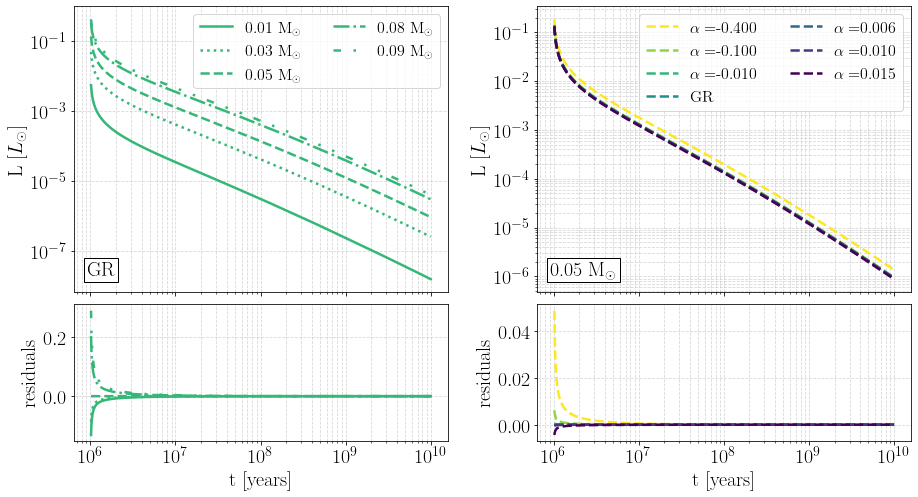

In [112]:
ls     = ["solid", "dotted", "dashed", "dashdot", (0, (3, 5, 1, 5, 1, 5))]
colors = bokeh.palettes.viridis(7) # 7 different combinations of alpha parameters
colors = colors[::-1] # reverse tuple

fig = plt.figure(figsize=(15, 8))
gs  = fig.add_gridspec(3, 2, hspace=0.09, wspace=0.24)
ax1 = fig.add_subplot(gs[0:2, 0])
ax2 = fig.add_subplot(gs[0:2, 1])
ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)
ax4 = fig.add_subplot(gs[2, 1], sharex=ax2)

a = 0.; j = 2; i = 0
for m in M:
    ax1.plot(time[a], luminosity[a][m], ls=ls[i], lw=2.5, color=colors[j], label=("%.2f $\\rm M_{\\odot}$" %m))
    ax3.plot(time[a], luminosity[a][m]-luminosity[a][M[2]], ls=ls[i], lw=2.5, color=colors[j])
    i += 1
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.tick_params(labelbottom=False)  
ax3.set_xscale("log")
ax1.grid(which="both", ls="--", alpha=0.5)
ax3.grid(which="both", ls="--", alpha=0.5)
ax3.set_xlabel("t [years]")
ax1.set_ylabel(r"L $[L_\odot]$")
ax3.set_ylabel(r"residuals")
ax1.legend(frameon=True, loc=1, ncol=2, fontsize=16)
text_box = AnchoredText("GR", frameon=True, loc=3, pad=0.15)
plt.setp(text_box.patch, facecolor="white")
ax1.add_artist(text_box)

j = 0; i = 2
for a in alpha:
    if a==0.:
        ax2.plot(time[a], luminosity[a][M[2]], ls=ls[i], lw=2.5, color=colors[j], label="GR")
    else:
        ax2.plot(time[a], luminosity[a][M[2]], ls=ls[i], lw=2.5, color=colors[j], label=("$\\alpha=$%.3f" %a))
    ax4.plot(time[a], luminosity[a][M[2]] - luminosity[0.][M[2]], ls=ls[i], lw=2.5, color=colors[j])
    j += 1
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.tick_params(labelbottom=False) 
ax4.set_xscale("log")
ax2.grid(which="both", ls="--", alpha=0.5)
ax4.grid(which="both", ls="--", alpha=0.5)
ax4.set_xlabel("t [years]")
ax2.set_ylabel(r"L $[L_\odot]$")
ax4.set_ylabel(r"residuals")
#ax4.set_ylabel(r"$\rm \mid residuals\mid$")
ax2.legend(frameon=True, loc=1, ncol=2, fontsize=16)
text_box = AnchoredText("0.05 $\\rm M_{\\odot}$", frameon=True, loc=3, pad=0.15)
plt.setp(text_box.patch, facecolor="white")
ax2.add_artist(text_box)

fig.savefig("../Figs/luminosity.pdf", bbox_inches="tight")

(-5.0, 50.0)

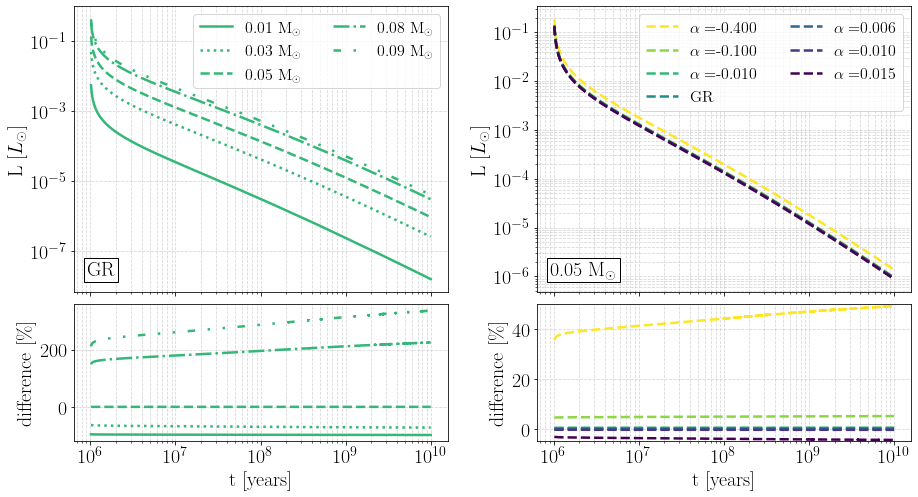

In [193]:
ls     = ["solid", "dotted", "dashed", "dashdot", (0, (3, 5, 1, 5, 1, 5))]
colors = bokeh.palettes.viridis(7) # 7 different combinations of alpha parameters
colors = colors[::-1] # reverse tuple

fig = plt.figure(figsize=(15, 8))
gs  = fig.add_gridspec(3, 2, hspace=0.09, wspace=0.24)
ax1 = fig.add_subplot(gs[0:2, 0])
ax2 = fig.add_subplot(gs[0:2, 1])
ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)
ax4 = fig.add_subplot(gs[2, 1], sharex=ax2)

a = 0.; j = 2; i = 0
for m in M:
    ax1.plot(time[a], luminosity[a][m], ls=ls[i], lw=2.5, color=colors[j], label=("%.2f $\\rm M_{\\odot}$" %m))
    ax3.plot(time[a], (luminosity[a][m]-luminosity[a][M[2]])/luminosity[a][M[2]]*100, ls=ls[i], lw=2.5, color=colors[j])
    i += 1
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.tick_params(labelbottom=False)  
ax3.set_xscale("log")
ax1.grid(which="both", ls="--", alpha=0.5)
ax3.grid(which="both", ls="--", alpha=0.5)
ax3.set_xlabel("t [years]")
ax1.set_ylabel(r"L $[L_\odot]$")
ax3.set_ylabel(r"difference [$\%$]")
ax1.legend(frameon=True, loc=1, ncol=2, fontsize=16)
text_box = AnchoredText("GR", frameon=True, loc=3, pad=0.15)
plt.setp(text_box.patch, facecolor="white")
ax1.add_artist(text_box)

j = 0; i = 2
for a in alpha:
    if a==0.:
        ax2.plot(time[a], luminosity[a][M[2]], ls=ls[i], lw=2.5, color=colors[j], label="GR")
    else:
        ax2.plot(time[a], luminosity[a][M[2]], ls=ls[i], lw=2.5, color=colors[j], label=("$\\alpha=$%.3f" %a))
    ax4.plot(time[a], (luminosity[a][M[2]] - luminosity[0.][M[2]])/luminosity[0.][M[2]]*100, ls=ls[i], lw=2.5, color=colors[j])
    j += 1
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.tick_params(labelbottom=False) 
ax4.set_xscale("log")
ax2.grid(which="both", ls="--", alpha=0.5)
ax4.grid(which="both", ls="--", alpha=0.5)
ax4.set_xlabel("t [years]")
ax2.set_ylabel(r"L $[L_\odot]$")
ax4.set_ylabel(r"difference [$\%$]")
#ax4.set_ylabel(r"$\rm \mid residuals\mid$")
ax2.legend(frameon=True, loc=1, ncol=2, fontsize=16)
text_box = AnchoredText("0.05 $\\rm M_{\\odot}$", frameon=True, loc=3, pad=0.15)
plt.setp(text_box.patch, facecolor="white")
ax2.add_artist(text_box)

ax4.set_ylim([-5, 50])

#fig.savefig("../Figs/luminosity_3.pdf", bbox_inches="tight")

In [194]:
print((0.08-0.05)/0.05)
print((0.08-0.05)/0.08)

0.6
0.375


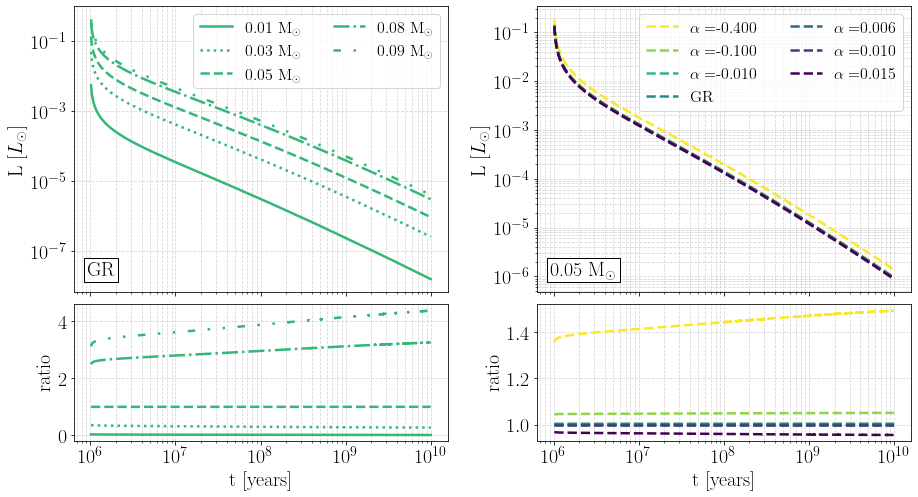

In [189]:
ls     = ["solid", "dotted", "dashed", "dashdot", (0, (3, 5, 1, 5, 1, 5))]
colors = bokeh.palettes.viridis(7) # 7 different combinations of alpha parameters
colors = colors[::-1] # reverse tuple

fig = plt.figure(figsize=(15, 8))
gs  = fig.add_gridspec(3, 2, hspace=0.09, wspace=0.24)
ax1 = fig.add_subplot(gs[0:2, 0])
ax2 = fig.add_subplot(gs[0:2, 1])
ax3 = fig.add_subplot(gs[2, 0], sharex=ax1)
ax4 = fig.add_subplot(gs[2, 1], sharex=ax2)

a = 0.; j = 2; i = 0
for m in M:
    ax1.plot(time[a], luminosity[a][m], ls=ls[i], lw=2.5, color=colors[j], label=("%.2f $\\rm M_{\\odot}$" %m))
    ax3.plot(time[a], luminosity[a][m]/luminosity[a][M[2]], ls=ls[i], lw=2.5, color=colors[j])
    i += 1
ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.tick_params(labelbottom=False)  
ax3.set_xscale("log")
ax1.grid(which="both", ls="--", alpha=0.5)
ax3.grid(which="both", ls="--", alpha=0.5)
ax3.set_xlabel("t [years]")
ax1.set_ylabel(r"L $[L_\odot]$")
ax3.set_ylabel(r"ratio")
ax1.legend(frameon=True, loc=1, ncol=2, fontsize=16)
text_box = AnchoredText("GR", frameon=True, loc=3, pad=0.15)
plt.setp(text_box.patch, facecolor="white")
ax1.add_artist(text_box)

j = 0; i = 2
for a in alpha:
    if a==0.:
        ax2.plot(time[a], luminosity[a][M[2]], ls=ls[i], lw=2.5, color=colors[j], label="GR")
    else:
        ax2.plot(time[a], luminosity[a][M[2]], ls=ls[i], lw=2.5, color=colors[j], label=("$\\alpha=$%.3f" %a))
    ax4.plot(time[a], luminosity[a][M[2]]/luminosity[0.][M[2]], ls=ls[i], lw=2.5, color=colors[j])
    j += 1
ax2.set_yscale("log")
ax2.set_xscale("log")
ax2.tick_params(labelbottom=False) 
ax4.set_xscale("log")
ax2.grid(which="both", ls="--", alpha=0.5)
ax4.grid(which="both", ls="--", alpha=0.5)
ax4.set_xlabel("t [years]")
ax2.set_ylabel(r"L $[L_\odot]$")
ax4.set_ylabel(r"ratio")
#ax4.set_ylabel(r"$\rm \mid residuals\mid$")
ax2.legend(frameon=True, loc=1, ncol=2, fontsize=16)
text_box = AnchoredText("0.05 $\\rm M_{\\odot}$", frameon=True, loc=3, pad=0.15)
plt.setp(text_box.patch, facecolor="white")
ax2.add_artist(text_box)

fig.savefig("../Figs/luminosity.pdf", bbox_inches="tight")

## Minimum Main Sequence Mass

\begin{equation}
\frac{M}{M_{\odot}} = \left[0.0141\frac{b_1^{0.266}}{k_R^{0.106}}\left[1+b(\Psi)+a\Psi\right]^{1.506}\Psi^{0.266\nu-0.59}\right]\frac{\gamma^{1.506}}{\delta^{0.512}}\left(1-1.33\frac{\alpha}{\delta}\right)^{0.106}
\end{equation}

In [143]:
alpha = [-0.4, -0.1, -0.01, 0., 0.006, 0.010, 0.015]
time  = {}
psi   = {}
for a in alpha:
    try:
        data = np.genfromtxt("../data/evolution_degeneracy_MMSM_alpha="+str(a)+".dat", unpack=True)
    except:
        print(a)
        data = np.genfromtxt("../data/evolution_degeneracy_MMSM_alpha=0.dat", unpack=True)
    time[a] = data[0]
    psi[a]  = data[1]

0.0


In [144]:
def MMSmass(psi, b1, nu, mu_1, mu_e, kR, gamma, delta, alpha):
    """
    Return MMSM [M/Msun]
    """
    f1 = 0.0141*np.power(b1, 0.266)*np.power(kR, -0.106)
    f2 = np.power(gamma, 1.506)*np.power(delta, -0.512)*np.power(1.-1.33*alpha/delta, 0.106)
    
    a = 5*mu_e/2*mu_1
    b = (-5./16.*psi*np.log(1-np.exp(-1./psi)) + 
        15./8.*psi*psi*(np.pi**2/2. + polylog(2, -np.exp(-1./psi))))
    
    # return
    return f1*f2*np.power(psi, 0.266*nu-0.59)*np.power(1+b+a*psi, 1.506)

Calculate time needed to reach the main sequence, i.e. $L_N/L=1$

In [145]:
MMSM = {}

alpha = [-0.4, -0.1, -0.01, 0., 0.006, 0.010, 0.015]
gamma = [1.63, 2.25, 2.35, 2.36, 2.36, 2.37, 2.46]
delta = [7.53, 6.67, 6.09, 5.97, 5.95, 5.93, 5.89]

b1  = 2.; nu = 1.60; xH = 0.5*0.51
X = 0.75; Y = 0.25; mu_1 = np.power((1+xH)*X + Y/4., -1); mu_e = np.power(X + Y/2., -1)
kR = 0.01; 

i = 0
for a in alpha:
    print("alpha = ", a)
    MMSM[a] = np.zeros(len(psi[a]))
    k = 0
    for _psi in psi[a]:
        # polylog() does not accept arrays (really?? --> check!). Therefore, include for --> very slow!
        MMSM[a][k] = MMSmass(_psi, b1, nu, mu_1, mu_e, kR, gamma[i], delta[i], alpha[i]) 
        k += 1
    i += 1

alpha =  -0.4
alpha =  -0.1
alpha =  -0.01
alpha =  0.0
alpha =  0.006
alpha =  0.01
alpha =  0.015


save

In [146]:
for a in alpha:
    output = open("../data/MMSM_up_alpha="+str(a)+".dat", "w")
    for k in range(len(psi[a])):
        output.write("%.6e %.6f\n" %(time[a][k], MMSM[a][k]))
output.close()

load

In [119]:
alpha = [-0.4, -0.1, -0.01, 0., 0.006, 0.010, 0.015]
time  = {}
MMSM  = {}
for a in alpha:
    # input file
    data     = np.genfromtxt("../data/MMSM_alpha="+str(a)+".dat", unpack=True)
    time[a]  = data[0]
    MMSM[a]  = data[1]

(0.03, 0.11)

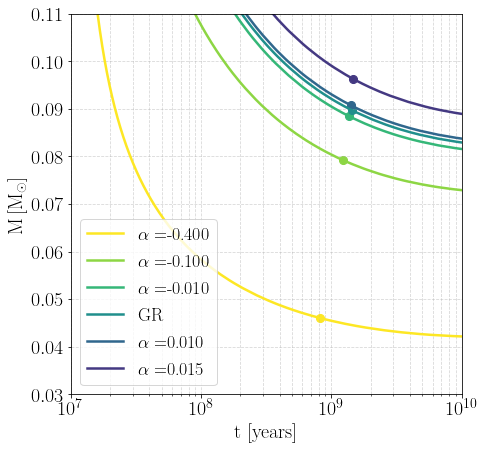

In [158]:
colors = bokeh.palettes.viridis(7) # 7 different combinations of alpha parameters
colors = colors[::-1] # reverse tuple

alpha    = [-0.4, -0.1, -0.01, 0., 0.010, 0.015]
MMSM_min = [0.046, 0.0792, 0.0884, 0.0897, 0.0907, 0.0963]

fig, ax = plt.subplots(1, 1, figsize=(7, 7))
j = 0
for a in alpha:
    if a==0.:
        ax.plot(time[a], MMSM[a], ls="-", lw=2.5, color=colors[j], label="GR")
    else:
        ax.plot(time[a], MMSM[a], ls="-", lw=2.5, color=colors[j], label=("$\\alpha=$%.3f" %a))
    ax.scatter(time_up[a][-1], MMSM_min[j], color=colors[j], s=65)
    j += 1

#ax.set_yscale("log")
ax.set_xscale("log")
ax.grid(which="both", ls="--", alpha=0.5)
ax.set_xlabel("t [years]")
ax.set_ylabel(r"$\rm M\,[M_\odot]$")
ax.legend(frameon=True, loc=3, ncol=1, fontsize=18)
ax.set_xlim([1e7, 1e10])
ax.set_ylim([0.03, 0.11])
#text_box = AnchoredText("Model D", frameon=True, loc=3, pad=0.15)
#plt.setp(text_box.patch, facecolor="white")
#ax.add_artist(text_box)
#fig.savefig("../Figs/MMSM.pdf", bbox_inches="tight")

remove points for which mass is smaller than the Main Sequence Minimum Mass

In [149]:
MMSM_min = [0.046, 0.0792, 0.0884, 0.0897, 0.0899, 0.0907, 0.0963]
i        = 0
time_up  = {}
MMSM_up  = {}
for a in alpha:
    pos = np.where(MMSM[a] > MMSM_min[i])
    time_up[a] = np.copy(time[a][pos])
    MMSM_up[a] = np.copy(MMSM[a][pos])
    i += 1

plot

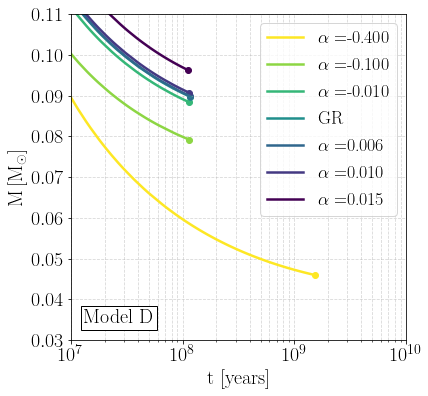

In [127]:
colors = bokeh.palettes.viridis(7) # 6 different combinations of alpha parameters
colors = colors[::-1] # reverse tuple


fig, ax = plt.subplots(1, 1, figsize=(6, 6))
j = 0
for a in alpha:
    if a==0.:
        ax.plot(time_up[a], MMSM_up[a], ls="-", lw=2.5, color=colors[j], label="GR")
    else:
        ax.plot(time_up[a], MMSM_up[a], ls="-", lw=2.5, color=colors[j], label=("$\\alpha=$%.3f" %a))
    ax.scatter(time_up[a][-1], MMSM_min[j], color=colors[j])
    j += 1
#ax.set_yscale("log")
ax.set_xscale("log")
ax.grid(which="both", ls="--", alpha=0.5)
ax.set_xlabel("t [years]")
ax.set_ylabel(r"$\rm M\,[M_\odot]$")
ax.legend(frameon=True, loc=1, ncol=1, fontsize=18)
ax.set_xlim([1e7, 1e10])
ax.set_ylim([0.03, 0.11])
text_box = AnchoredText("Model D", frameon=True, loc=3, pad=0.15)
plt.setp(text_box.patch, facecolor="white")
ax.add_artist(text_box)

fig.savefig("../Figs/MMSM.pdf", bbox_inches="tight")

In [132]:
i = 0

psi_MMSM = [0.0685523, 0.14029, 0.143859, 0.143364, 0.143805, 0.144605, 0.146989]

for a in alpha:
    l = luminosity(psi_MMSM[i], MMSM_min[i], b1, nu, mu_1, mu_e, kR, gamma[i], delta[i], a)
    print ("%.3f  %.4f  %.2e  %.2e" %(a, MMSM_min[i], time_up[a][-1], l))
    i+=1

-0.400  0.0460  1.53e+09  9.41e-06
-0.100  0.0792  1.15e+08  3.91e-04
-0.010  0.0884  1.14e+08  4.85e-04
0.000  0.0897  1.18e+08  4.85e-04
0.006  0.0899  1.17e+08  4.92e-04
0.010  0.0907  1.15e+08  5.09e-04
0.015  0.0963  1.11e+08  5.82e-04


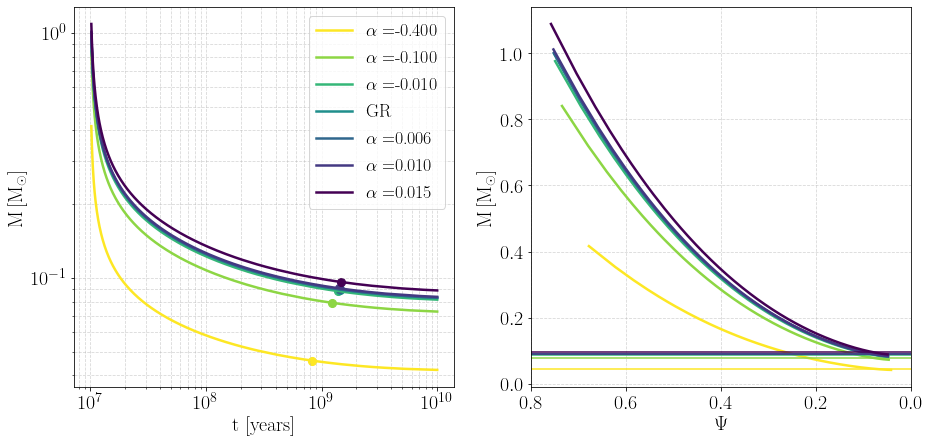

In [167]:
colors = bokeh.palettes.viridis(7) # 7 different combinations of alpha parameters
colors = colors[::-1] # reverse tuple

alpha    = [-0.4, -0.1, -0.01, 0., 0.006, 0.010, 0.015]
MMSM_min = [0.046, 0.0792, 0.0884, 0.0897, 0.0899, 0.0907, 0.0963]

fig, ax = plt.subplots(1, 2, figsize=(15, 7))
j = 0
for a in alpha:
    if a==0.:
        ax[0].plot(time[a], MMSM[a], ls="-", lw=2.5, color=colors[j], label="GR")
    else:
        ax[0].plot(time[a], MMSM[a], ls="-", lw=2.5, color=colors[j], label=("$\\alpha=$%.3f" %a))
    ax[1].plot(psi[a], MMSM[a], ls="-", lw=2.5, color=colors[j])
    ax[0].scatter(time_up[a][-1], MMSM_min[j], color=colors[j], s=65)
    ax[1].axhline(MMSM_min[j], color=colors[j])
    j += 1

ax[0].set_xscale("log")
ax[0].set_yscale("log")
ax[0].grid(which="both", ls="--", alpha=0.5)
ax[0].set_xlabel("t [years]")
ax[0].set_ylabel(r"$\rm M\,[M_\odot]$")
ax[0].legend(frameon=True, loc=1, ncol=1, fontsize=18)
#ax[0].set_xlim([1e7, 1e10])
#ax[0].set_ylim([0.03, 0.11])

ax[1].set_ylabel(r"$\rm M\,[M_\odot]$")
ax[1].set_xlabel(r"$\Psi$")
ax[1].set_xlim([0.8, 0.])
ax[1].grid(which="both", alpha=0.5, ls="--")

In [173]:
def F(psi, b1, nu, mu_1, mu_e, kR):
    
    f1 = 0.0141*np.power(b1, 0.266)*np.power(kR, -0.106)
    
    a = 5*mu_e/2*mu_1
    b = (-5./16.*psi*np.log(1-np.exp(-1./psi)) + 
        15./8.*psi*psi*(np.pi**2/2. + polylog(2, -np.exp(-1./psi))))
    
    # return
    return f1*np.power(psi, 0.266*nu-0.59)*np.power(1+b+a*psi, 1.506)
    


psi  = np.linspace(0, 1, 50)
Fpsi = np.zeros(len(psi))

i = 0
for _psi in psi:
    Fpsi[i] = F(_psi, b1, nu, mu_1, mu_e, kR)
    i+=1

<ipython-input-173-1311d0de0ca4>:6: RuntimeWarning: divide by zero encountered in double_scalars
  b = (-5./16.*psi*np.log(1-np.exp(-1./psi)) +
<ipython-input-173-1311d0de0ca4>:7: RuntimeWarning: divide by zero encountered in double_scalars
  15./8.*psi*psi*(np.pi**2/2. + polylog(2, -np.exp(-1./psi))))
<ipython-input-173-1311d0de0ca4>:10: RuntimeWarning: divide by zero encountered in power
  return f1*np.power(psi, 0.266*nu-0.59)*np.power(1+b+a*psi, 1.506)


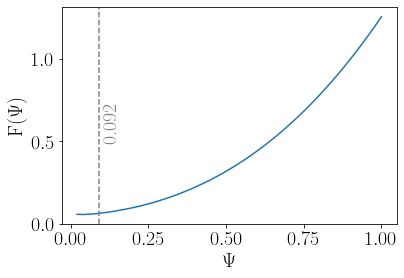

In [180]:
fig, ax = plt.subplots()

ax.plot(psi, Fpsi)

ax.axvline(0.092, ls="--", color="grey")
ax.text(0.1, 0.5, "0.092", color="grey", rotation=90)

ax.set_ylabel(r"F($\Psi$)")
ax.set_xlabel(r"$\Psi$")

fig.savefig("../Figs/Fpsi.pdf")

In [175]:
print(F(0.092, b1, nu, mu_1, mu_e, kR))
print(F(0.01, b1, nu, mu_1, mu_e, kR))

0.0635563950945327
0.0615231359452506
